In [1]:
sample_space = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
A = {1, 3, 8, 7, 2}
B = {1, 3, 9, 10}

In [2]:
# What is A intersection B (AnB)
A.intersection(B)

{1, 3}

In [9]:
# What is not B or compliment of B (B')
b_compliment = sample_space.difference(B)
b_compliment

{2, 4, 5, 6, 7, 8}

In [10]:
# What is A intersection B' (AnB')
A.intersection(b_compliment)

{2, 7, 8}

In [11]:
# A certain disease affects 1% of the population
# There is a test for the disease with the following properties:
# . if a person has the disease

((99 / 100) * (1 / 100)) / (((99 / 100) * (1 / 100)) + ((5 / 100) * (99 / 100)))

0.16666666666666669

# Pandas practice

In [21]:
from pathlib import Path

import pandas as pd

path = Path().joinpath("..", "data", "healthcare_dataset_1.csv")

df = pd.read_csv(path)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [22]:
# Using lambda, create a new column that has first three letters of medication

df["med_code"] = df["Medication"].apply(lambda x: x[:3])
df["med_code"]

0        Par
1        Ibu
2        Asp
3        Ibu
4        Pen
        ... 
55495    Pen
55496    Asp
55497    Ibu
55498    Ibu
55499    Ibu
Name: med_code, Length: 55500, dtype: object

In [23]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,med_code
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Par
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Ibu
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Asp
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Ibu
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Pen


In [29]:
# Doctors are conducting research to find whether Blood type A+ has anything to do with Cancer.

# Find weather Blood type and Cancer are dependent or independent

# P(AnB) close to P(A) * P(B)

prob_of_int = len(df[(df["Blood Type"] == "A+") & (df["Medical Condition"] == "Cancer")]) / len(df)  # P(AnB)
prob_of_A = len(df[df["Blood Type"] == "A+"]) / len(df)  # P(A)
prob_of_B = len(df[df["Medical Condition"] == "Cancer"]) / len(df)  # P(B)

prod_A_and_B = prob_of_A * prob_of_B
print("P(A) * P(B):", prod_A_and_B)
print("P(AnB):", prob_of_int)

print("As both are close to each other they are independent")

P(A) * P(B): 0.020836948948948948
P(AnB): 0.021351351351351352
As both are close to each other they are independent


In [39]:
# Doctors want your help to extend this all blood group vs Cancer
# Use groupby + apply to solve this problem


def get_probability(group):
    prob_of_cancer = len(df[df["Medical Condition"] == "Cancer"]) / len(df)
    prob_of_blood_group = len(group) / len(df)
    prob_of_intersection = len(group[group["Medical Condition"] == "Cancer"]) / len(df)
    prob_of_products = prob_of_cancer * prob_of_blood_group

    return pd.Series(
        {
            "prob of Cancer": prob_of_cancer,
            "prob of Blood Group": prob_of_blood_group,
            "prob of Intersection": prob_of_intersection,
            "prob of Products": prob_of_products,
        }
    )


df.groupby("Blood Type").apply(get_probability)

# Based of results, Blood type has noting to do with Cancer they are independent

C:\Users\jriyaz\AppData\Local\Temp\ipykernel_22184\4250559350.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Blood Type").apply(get_probability)


,prob of Cancer,prob of Blood Group,prob of Intersection,prob of Products
Blood Type,,,,
A+,0.166252,0.125333,0.021351,0.020837
A-,0.166252,0.125568,0.020432,0.020876
AB+,0.166252,0.125171,0.020036,0.020810
AB-,0.166252,0.125135,0.021586,0.020804
B+,0.166252,0.125135,0.021550,0.020804
B-,0.166252,0.125117,0.020613,0.020801
O+,0.166252,0.124631,0.019964,0.020720
O-,0.166252,0.123910,0.020721,0.020600


Text(0, 0.5, 'Billing Amount')

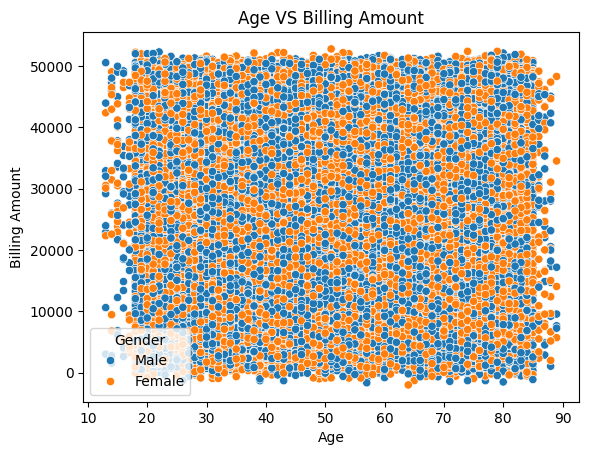

In [42]:
# Analyse the relationship b/w age and billing amount using different methods
# Also check if gender plays a role in the relationship

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="Age", y="Billing Amount", hue="Gender")
plt.title("Age VS Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing Amount")

In [47]:
df[["Age", "Billing Amount"]].corr()

# Correlation close to 0 (zero) it means no relationship b/w age and Billing amount
# Correlation is 1 it means one increases with other
# Correlation is -1 it means one increases the other will decrease

# There is no corr-relation

,Age,Billing Amount
Age,1.000000,-0.003832
Billing Amount,-0.003832,1.000000


<Axes: xlabel='Age'>

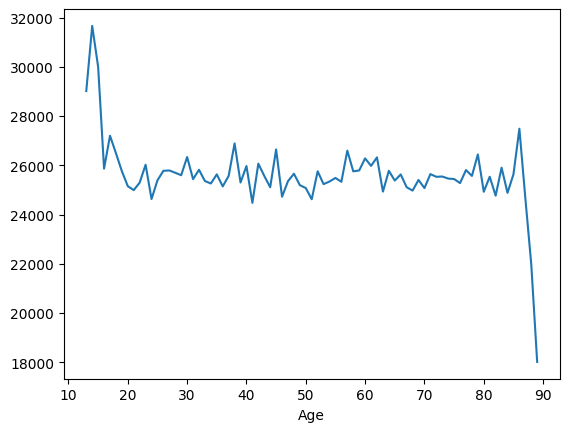

In [46]:
df.groupby("Age")["Billing Amount"].mean().plot()